# Calibration plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Calibration Full model - Range 2

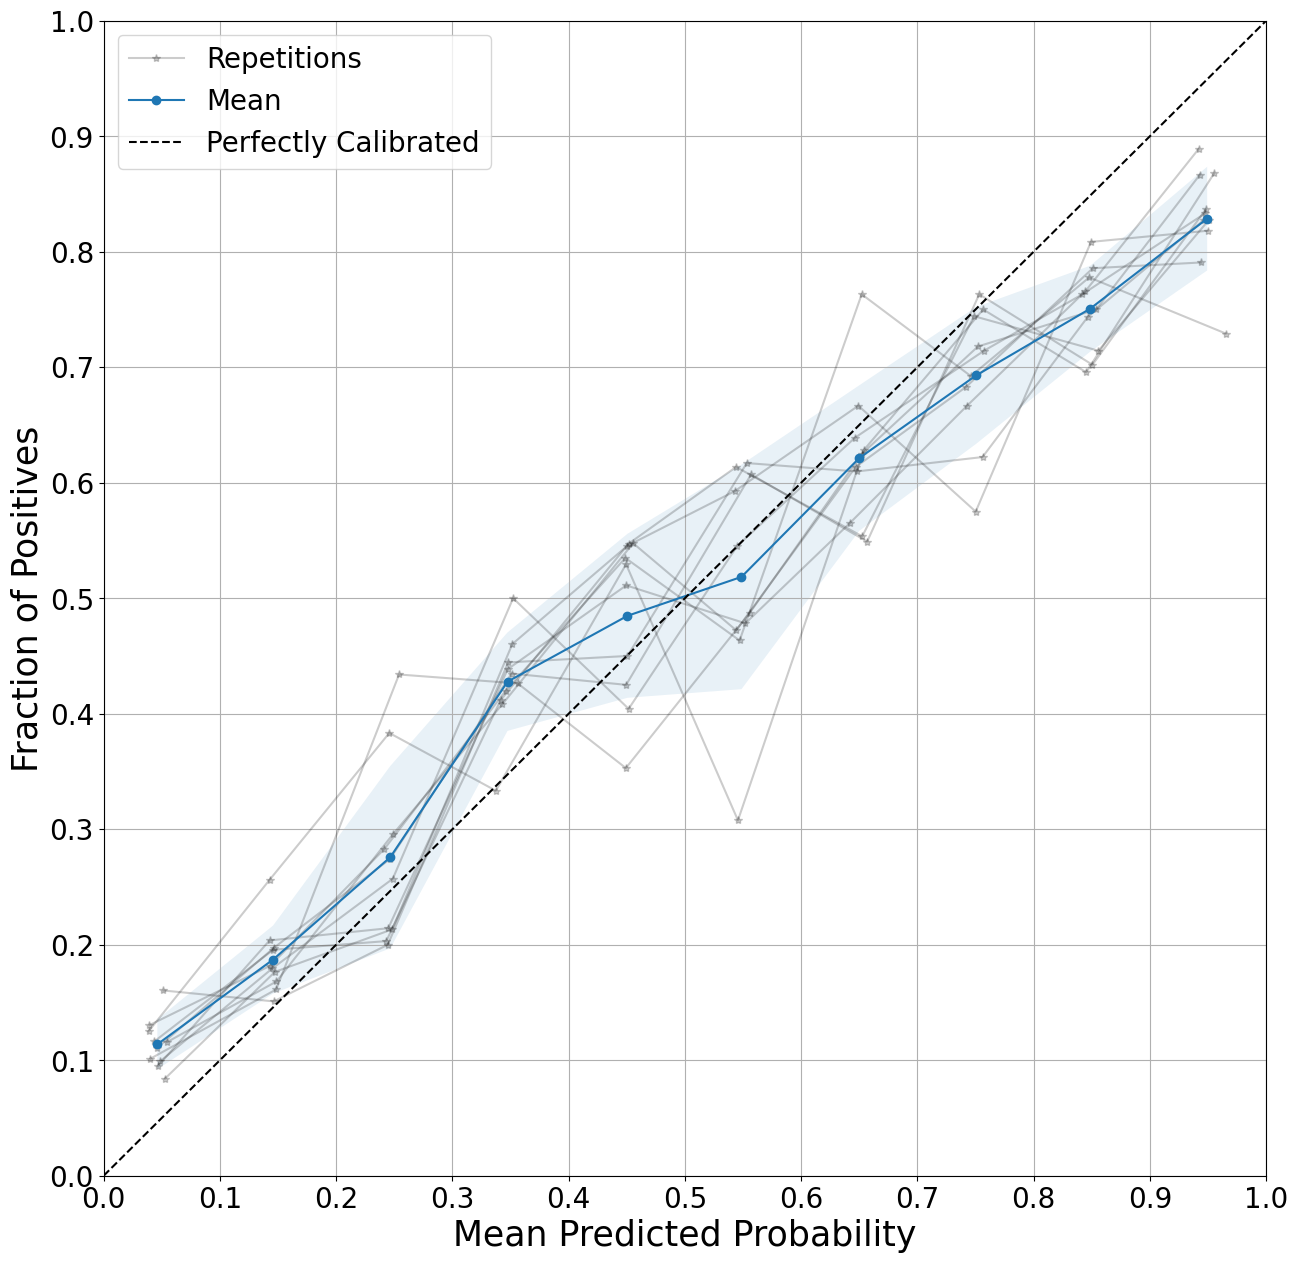

In [21]:

data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/"

y_true = pd.read_csv(data_dir +"y_true_Full.csv", index_col=0)
y_pred = pd.read_csv(data_dir +"Full_predictions.csv", index_col=0)


# Create a new DataFrame with the first 10 columns for each group
reshape_true = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_true.iloc[:,column]])

    reshape_true = pd.concat([reshape_true, new_col], axis=1)

reshape_true = reshape_true.dropna()
# Display the new DataFrame

# Create a new DataFrame with the first 10 columns for each group
reshape_pred = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_pred.iloc[:,column]])

    reshape_pred = pd.concat([reshape_pred, new_col], axis=1)

reshape_pred = reshape_pred.dropna()

df_fraction = pd.DataFrame()
df_mean_predicted = pd.DataFrame()

fig, ax = plt.subplots(1, 1, figsize=[15, 15])
for fold in range(reshape_pred.shape[1]):
    fraction_of_positives, mean_predicted_value = calibration_curve(
        reshape_true.iloc[:, fold], reshape_pred.iloc[:, fold], n_bins=10, strategy='uniform'
    )
    df_fraction[fold] = fraction_of_positives
    df_mean_predicted[fold] = mean_predicted_value
    if fold == 0:
        plt.plot(mean_predicted_value, fraction_of_positives, label='Repetitions', marker='*', alpha=0.2, color="black")

    else:
        plt.plot(mean_predicted_value, fraction_of_positives,  marker='*', alpha=0.2, color="black")

plt.plot(df_mean_predicted.mean(axis=1), df_fraction.mean(axis=1), label='Mean', marker='o')
lim = [0,1]
# Plot the diagonal line for perfect calibration
plt.plot(lim, lim, linestyle='--', color='black', label='Perfectly Calibrated')
ax.fill_between(df_mean_predicted.mean(axis=1), df_fraction.mean(axis=1)-df_fraction.std(axis=1),
                df_fraction.mean(axis=1)+df_fraction.std(axis=1) ,alpha=0.1)
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.xlim(lim)
plt.ylim(lim)
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.grid()
plt.show()

# Difference calibration Full model Range 1 and 2 

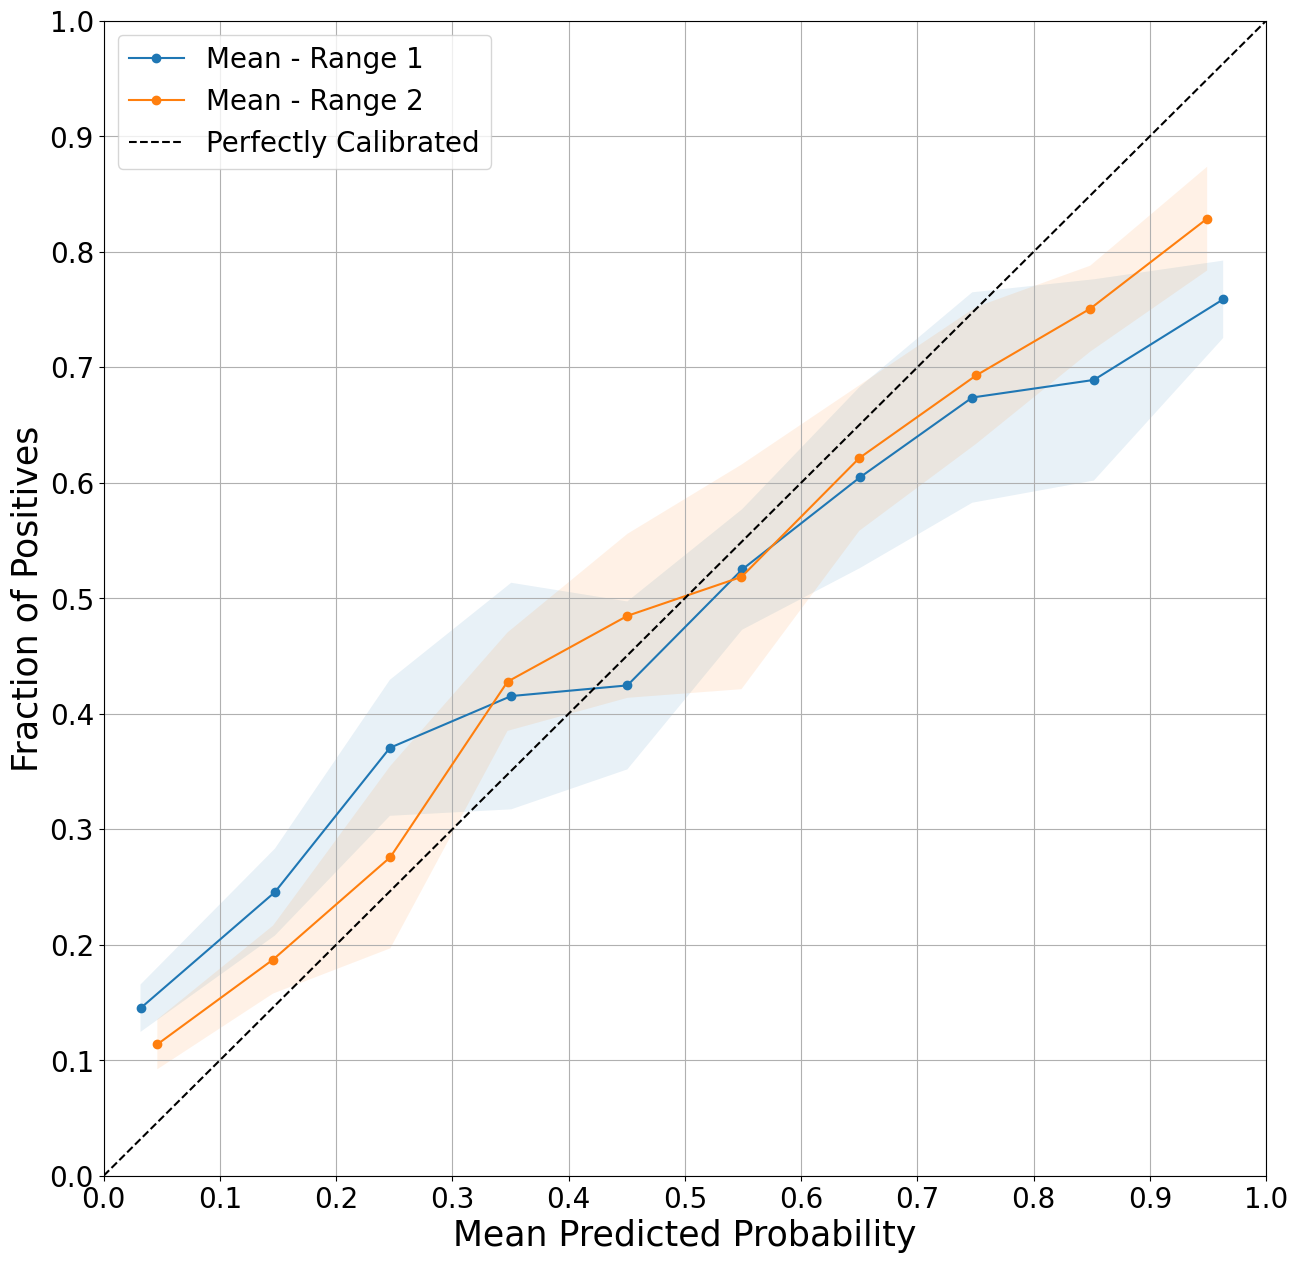

In [17]:
data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/optuna/big_experiment/"

y_true = pd.read_csv(data_dir +"y_true_Full_v3.csv", index_col=0)
y_pred = pd.read_csv(data_dir +"predictions_Full_v3.csv", index_col=0)


# Create a new DataFrame with the first 10 columns for each group
reshape_true = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_true.iloc[:,column]])

    reshape_true = pd.concat([reshape_true, new_col], axis=1)

reshape_true = reshape_true.dropna()
# Display the new DataFrame

# Create a new DataFrame with the first 10 columns for each group
reshape_pred = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_pred.iloc[:,column]])

    reshape_pred = pd.concat([reshape_pred, new_col], axis=1)

reshape_pred = reshape_pred.dropna()

df_fraction = pd.DataFrame()
df_mean_predicted = pd.DataFrame()

for fold in range(reshape_pred.shape[1]):
    fraction_of_positives, mean_predicted_value = calibration_curve(
        reshape_true.iloc[:, fold], reshape_pred.iloc[:, fold], n_bins=10, strategy='uniform'
    )
    df_fraction[fold] = fraction_of_positives
    df_mean_predicted[fold] = mean_predicted_value
    # if fold == 0:
    #     # plt.plot(mean_predicted_value, fraction_of_positives, label='Repetitions Range 1', marker='*', alpha=0.2, color="black")

    # else:
    #     plt.plot(mean_predicted_value, fraction_of_positives,  marker='*', alpha=0.2, color="black")
fig, ax = plt.subplots(1, 1, figsize=[15, 15])

plt.plot(df_mean_predicted.mean(axis=1), df_fraction.mean(axis=1), label='Mean - Range 1', marker='o')


lim = [0,1]
# Plot the diagonal line for perfect calibration
ax.fill_between(df_mean_predicted.mean(axis=1), df_fraction.mean(axis=1)-df_fraction.std(axis=1),
                df_fraction.mean(axis=1)+df_fraction.std(axis=1) ,alpha=0.1)

data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/"

y_true = pd.read_csv(data_dir +"y_true_Full.csv", index_col=0)
y_pred = pd.read_csv(data_dir +"Full_predictions.csv", index_col=0)


# Create a new DataFrame with the first 10 columns for each group
reshape_true = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_true.iloc[:,column]])

    reshape_true = pd.concat([reshape_true, new_col], axis=1)

reshape_true = reshape_true.dropna()
# Display the new DataFrame

# Create a new DataFrame with the first 10 columns for each group
reshape_pred = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_pred.iloc[:,column]])

    reshape_pred = pd.concat([reshape_pred, new_col], axis=1)

reshape_pred = reshape_pred.dropna()

df_fraction = pd.DataFrame()
df_mean_predicted = pd.DataFrame()

for fold in range(reshape_pred.shape[1]):
    fraction_of_positives, mean_predicted_value = calibration_curve(
        reshape_true.iloc[:, fold], reshape_pred.iloc[:, fold], n_bins=10, strategy='uniform'
    )
    df_fraction[fold] = fraction_of_positives
    df_mean_predicted[fold] = mean_predicted_value

plt.plot(df_mean_predicted.mean(axis=1), df_fraction.mean(axis=1), label='Mean - Range 2', marker='o')
ax.fill_between(df_mean_predicted.mean(axis=1), df_fraction.mean(axis=1)-df_fraction.std(axis=1),
                df_fraction.mean(axis=1)+df_fraction.std(axis=1) ,alpha=0.1)


plt.plot(lim, lim, linestyle='--', color='black', label='Perfectly Calibrated')

plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.xlim(lim)
plt.ylim(lim)
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.grid()
plt.show()

# Calibration Admission model - Range 2

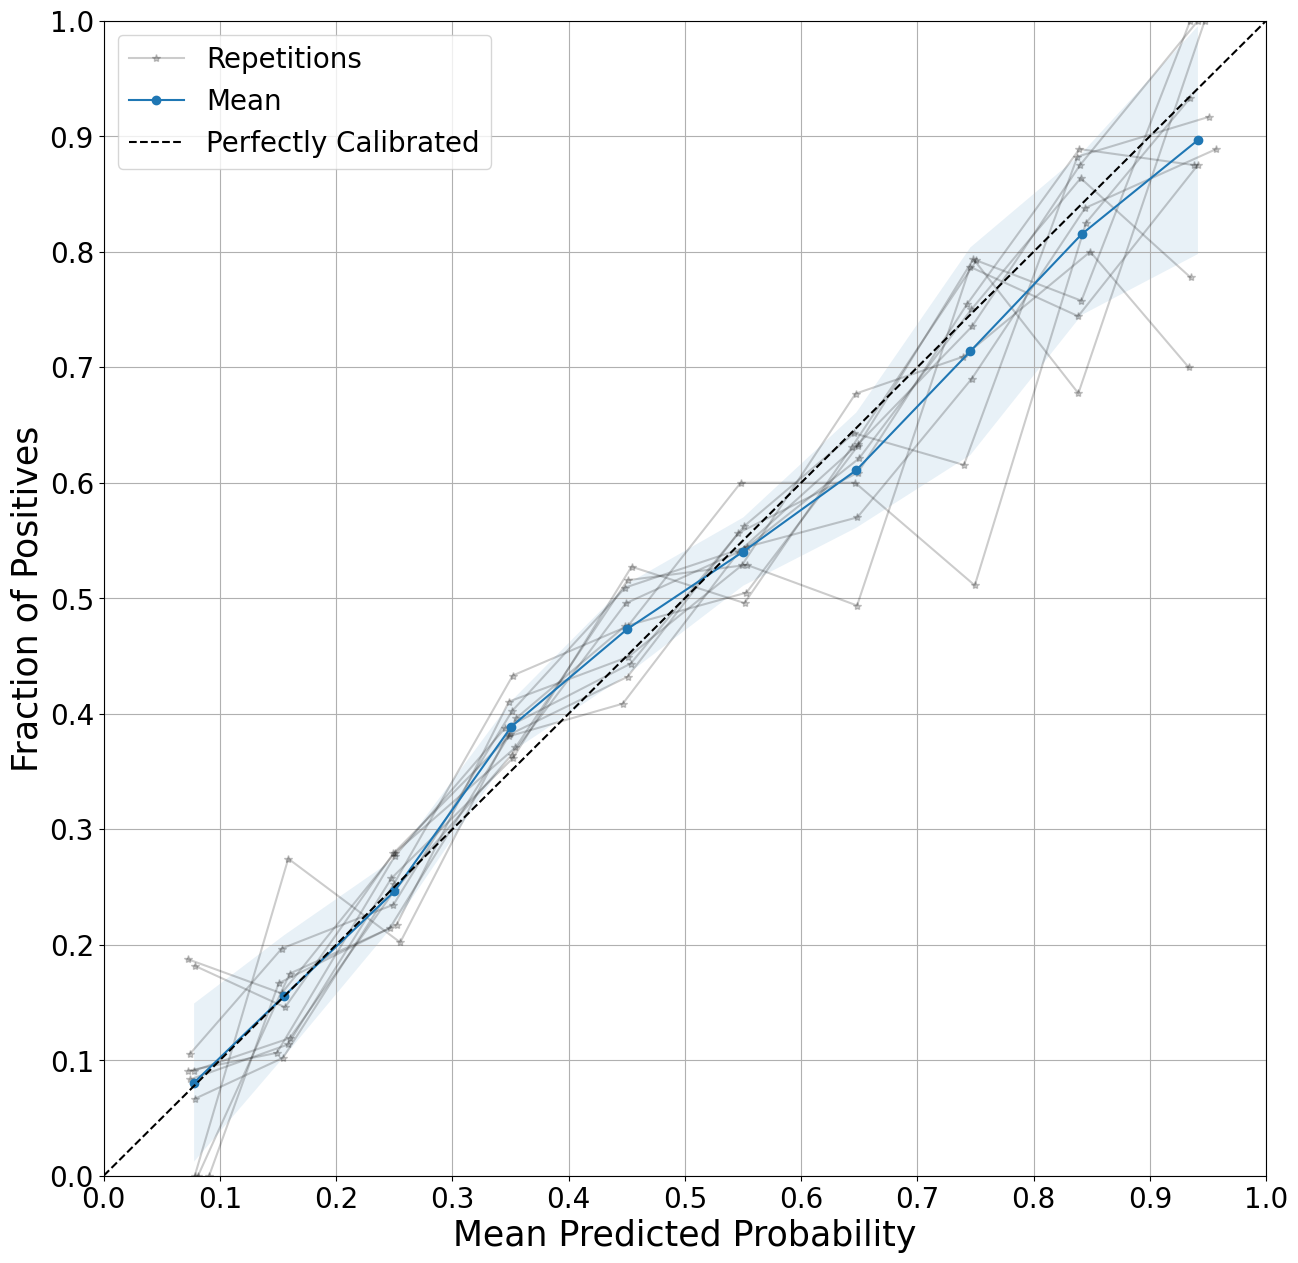

range(0, 1, 10)

In [4]:
data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"

y_true = pd.read_csv(data_dir +"y_true_Admission.csv", index_col=0)
y_true = y_true.T
y_pred = pd.read_csv(data_dir +"Admission_predictions.csv", index_col=0)
y_pred = y_pred.T


# Create a new DataFrame with the first 10 columns for each group
reshape_true = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_true.iloc[:,column]])

    reshape_true = pd.concat([reshape_true, new_col], axis=1)

reshape_true = reshape_true.dropna()
# Display the new DataFrame

# Create a new DataFrame with the first 10 columns for each group
reshape_pred = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_pred.iloc[:,column]])

    reshape_pred = pd.concat([reshape_pred, new_col], axis=1)

reshape_pred = reshape_pred.dropna()

df_fraction = pd.DataFrame()
df_mean_predicted = pd.DataFrame()

fig, ax = plt.subplots(1, 1, figsize=[15, 15])
for fold in range(reshape_pred.shape[1]):
    fraction_of_positives, mean_predicted_value = calibration_curve(
        reshape_true.iloc[:, fold], reshape_pred.iloc[:, fold], n_bins=10, strategy='uniform'
    )
    df_fraction[fold] = fraction_of_positives
    df_mean_predicted[fold] = mean_predicted_value
    if fold == 0:
        plt.plot(mean_predicted_value, fraction_of_positives, label='Repetitions', marker='*', alpha=0.2, color="black")
    else:
        plt.plot(mean_predicted_value, fraction_of_positives,  marker='*', alpha=0.2, color="black")


plt.plot(df_mean_predicted.mean(axis=1), df_fraction.mean(axis=1), label='Mean', marker='o')
lim = [0,1]
# Plot the diagonal line for perfect calibration
plt.plot(lim, lim, linestyle='--', color='black', label='Perfectly Calibrated')
ax.fill_between(df_mean_predicted.mean(axis=1), df_fraction.mean(axis=1)-df_fraction.std(axis=1),
                df_fraction.mean(axis=1)+df_fraction.std(axis=1) ,alpha=0.1)
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.xlim(lim)
plt.ylim(lim)
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.grid()
plt.show()
range(0,1,10)

# Difference calibration Admission model Range 1 and 2 

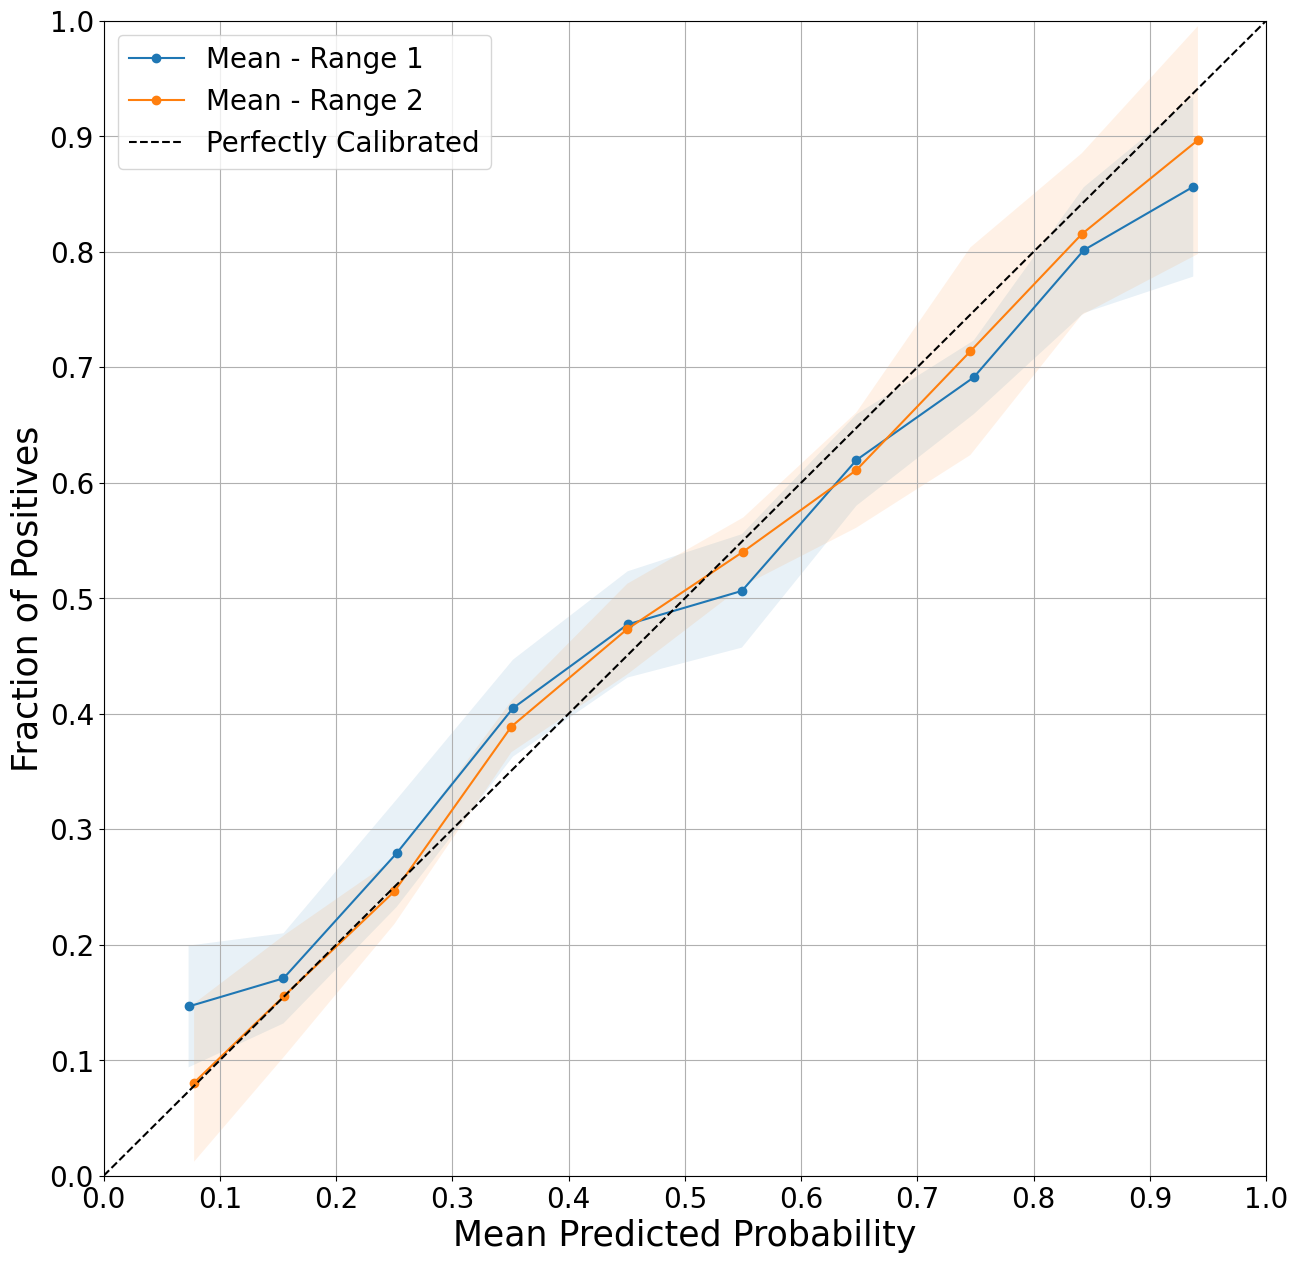

In [18]:
data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/optuna/big_experiment/"

y_true = pd.read_csv(data_dir +"y_true_Admission.csv", index_col=0)
y_pred = pd.read_csv(data_dir +"predictions_Admission.csv", index_col=0)


# Create a new DataFrame with the first 10 columns for each group
reshape_true = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_true.iloc[:,column]])

    reshape_true = pd.concat([reshape_true, new_col], axis=1)

reshape_true = reshape_true.dropna()
# Display the new DataFrame

# Create a new DataFrame with the first 10 columns for each group
reshape_pred = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_pred.iloc[:,column]])

    reshape_pred = pd.concat([reshape_pred, new_col], axis=1)

reshape_pred = reshape_pred.dropna()

df_fraction = pd.DataFrame()
df_mean_predicted = pd.DataFrame()

for fold in range(reshape_pred.shape[1]):
    fraction_of_positives, mean_predicted_value = calibration_curve(
        reshape_true.iloc[:, fold], reshape_pred.iloc[:, fold], n_bins=10, strategy='uniform'
    )
    df_fraction[fold] = fraction_of_positives
    df_mean_predicted[fold] = mean_predicted_value
fig, ax = plt.subplots(1, 1, figsize=[15, 15])

plt.plot(df_mean_predicted.mean(axis=1), df_fraction.mean(axis=1), label='Mean - Range 1', marker='o')
ax.fill_between(df_mean_predicted.mean(axis=1), df_fraction.mean(axis=1)-df_fraction.std(axis=1),
                df_fraction.mean(axis=1)+df_fraction.std(axis=1) ,alpha=0.1)



data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"

y_true = pd.read_csv(data_dir +"y_true_Admission.csv", index_col=0)
y_true = y_true.T
y_pred = pd.read_csv(data_dir +"Admission_predictions.csv", index_col=0)
y_pred = y_pred.T

# Create a new DataFrame with the first 10 columns for each group
reshape_true = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_true.iloc[:,column]])

    reshape_true = pd.concat([reshape_true, new_col], axis=1)

reshape_true = reshape_true.dropna()
# Display the new DataFrame

# Create a new DataFrame with the first 10 columns for each group
reshape_pred = pd.DataFrame()

for fold_id in range(10):
    # print(fold_id)
    new_col = pd.DataFrame()
    fold_id = fold_id*10
    for repetition in range(10):

        column = fold_id + repetition
        new_col = pd.concat([new_col, y_pred.iloc[:,column]])

    reshape_pred = pd.concat([reshape_pred, new_col], axis=1)

reshape_pred = reshape_pred.dropna()

df_fraction = pd.DataFrame()
df_mean_predicted = pd.DataFrame()

for fold in range(reshape_pred.shape[1]):
    fraction_of_positives, mean_predicted_value = calibration_curve(
        reshape_true.iloc[:, fold], reshape_pred.iloc[:, fold], n_bins=10, strategy='uniform'
    )
    df_fraction[fold] = fraction_of_positives
    df_mean_predicted[fold] = mean_predicted_value

plt.plot(df_mean_predicted.mean(axis=1), df_fraction.mean(axis=1), label='Mean - Range 2', marker='o')



lim = [0,1]
# Plot the diagonal line for perfect calibration
plt.plot(lim, lim, linestyle='--', color='black', label='Perfectly Calibrated')
ax.fill_between(df_mean_predicted.mean(axis=1), df_fraction.mean(axis=1)-df_fraction.std(axis=1),
                df_fraction.mean(axis=1)+df_fraction.std(axis=1) ,alpha=0.1)
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.xlim(lim)
plt.ylim(lim)
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.grid()
plt.show()